In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from stable_baselines3 import PPO

from environments.onestep import ARESEAOneStep

In [2]:
model = PPO.load("models/winter-plant-8")

In [6]:
env = ARESEAOneStep()

Desired: [ 0.000562   -0.00118558  0.00034834  0.00020286]


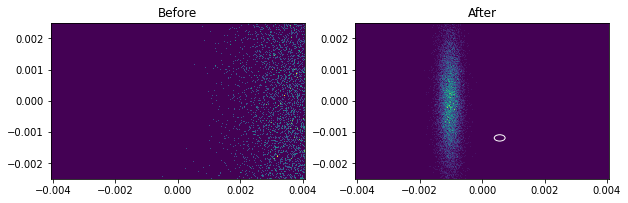

In [40]:
observation = env.reset()

before = env.segment.AREABSCR1.reading

action, _ = model.predict(observation, deterministic=True)
env.step(action)

after = env.segment.AREABSCR1.reading

print("Desired:", env.desired)

screen = env.segment.AREABSCR1

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(before, extent=screen.extent, interpolation="None")
plt.title("Before")

plt.subplot(122)
plt.imshow(after, extent=screen.extent, interpolation="None")
mu_x, mu_y, sigma_x, sigma_y = env.desired
ellipse = Ellipse((mu_x,mu_y), sigma_x, sigma_y, fill=False, color="white")
plt.gca().add_patch(ellipse)
plt.title("After")

plt.show()